### Title: Investment Patterns for startup companies


### 1. Introduction:

In this project try to understand the investment patterns in startup companies. Our goal is to study the monthly report from Crunch Base to discover what kind of startups get the most attention.In the end, we present the insights in the form of simple plots that can be easily understood by the one asking questions of the data.


<strong>In order to arrive at our goal we will attempt to visualize the ansers to the following questions:</strong>
* Q1: How many unique companies were funded during the period under consideration?
* Q2: What are the top 10 markets by the number of companies that were funded?
* Q3: What were the markets that received the highest average funding in usd?
* Q3: what were the top five conutries with the highest averge funding?
* Q4: for the market with the highest average investment, what is the trend in the funding ammount? Is it increasing or decreasing?

<strong>Data source:</strong> https://public.tableau.com/s/sites/default/files/media/Resources/crunchbase_monthly_export_d43b4klo2ade53.xlsx

<strong>Data description:</strong> 
The dataset is an excel file containing information about startup companies, investments received, and acquisitions as provided by Crunchbase . The sheets containing data of interest are -Companies, - Rounds, - Investments, - Acquisition.

In [40]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import functions as fx   # these are functions i prepared earlier to perform routine steps quickly

In [2]:
## # load data
with open('pickled_data','rb') as inf:
    companies_df = pickle.load(inf)

In [ ]:
# load data
print('== Crunch Base Monthly Dataset ==: ')
companies_df = fx.load_data('crunchbase_monthly.xlsx',sheetname='Companies')

In [ ]:
# since lading takes a while, i'll pickle the data
import pickle
with open('pickled_data','wb') as out:
    pickle.dump(companies_df,out)

In [3]:
fx.preview_data(companies_df)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01 00:00:00,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,2010-06-04 00:00:00,2010-09-23 00:00:00
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26 00:00:00,2012-10,2012-Q4,2012.0,2012-08-09 00:00:00,2012-08-09 00:00:00
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01 00:00:00,2011-04,2011-Q2,2011.0,2011-04-01 00:00:00,2011-04-01 00:00:00
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01 00:00:00,2014-01,2014-Q1,2014.0,2014-08-17 00:00:00,2014-09-26 00:00:00
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,2011-10-10 00:00:00,2011-10,2011-Q4,2011.0,2013-05-31 00:00:00,2013-05-31 00:00:00


### 2. Preprocessing
* check for duplicate records
* check for missing data
* check for possibly out-of-place data in rows

In [6]:
#fx.check_duplicates(companies_df,subset='name')

Total number of duplicate records :  87
Number of unique records with duplicates: 77


### strategy for removing duplicates :
* Goal:

###  Check for out-of-place data

In [11]:
companies_df.describe(include='all') 

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
count,49438,49437,45989,45477,45470,4.943800e+04,48124,44165,30161,44165,43322,49438.000000,38554,38482,38482,38482.000000,49438,49438
unique,49436,49350,45850,16675,753,NaN,3,115,61,1089,4188,NaN,3369,420,218,NaN,3914,3657
top,/organization/prysm,Roost,http://monoco.jp,|Software|,Software,NaN,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01 00:00:00,2012-01,2012-Q1,NaN,2012-01-01 00:00:00,2013-01-01 00:00:00
freq,2,4,2,3650,4620,NaN,41829,28793,9917,6804,2615,NaN,2181,2327,2904,NaN,468,387
mean,NaN,NaN,NaN,NaN,NaN,1.318989e+07,NaN,NaN,NaN,NaN,NaN,1.696205,NaN,NaN,NaN,2007.359129,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.535801e+08,NaN,NaN,NaN,NaN,NaN,1.294213,NaN,NaN,NaN,7.579203,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1902.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.000000e+04,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,2006.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,2010.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,6.800000e+06,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,2012.000000,NaN,NaN


### 3. Analysis & Visualization
<strong>We attempt to answer the following questions</strong>
* Q1: How many unique comapnies were funded during the period under consideration?
* Q2: What are the top 10 markets and their percentage contribution to the funded comapnies?
* Q3: What are the top 10 markets with the highest average funding in usd?
* Q3: what were the top five conutries with the highest averge funding?
* Q4: for the market with the highest average investment, what is the trend in the funding ammount? Is it increasing or decreasing?
#### NOTE: 
*

In [19]:
import matplotlib.style as style
#style.available
style.use('seaborn-darkgrid')

In [5]:
# Q1: How many unique comapnies are in the dataset?
companies_df.name.unique().shape

(49351,)

In [6]:
# Q2: What are the top 10 markets by the number of companies that were funded?
topX = 10
markets = companies_df[['market','name']].groupby(by='market').count().reset_index()
markets['percent'] = markets['name'].apply(lambda x: round(x/float(markets.name.sum())*100,1))
markets = markets.sort_values(by='name',ascending=False,inplace=False)[:topX]
markets = fx.sort_bars(markets)
markets

,market,name,percent
0,Hardware + Software,1081,2.4
1,Games,1182,2.6
2,Clean Technology,1200,2.6
3,Health Care,1207,2.7
4,Enterprise Software,1280,2.8
5,Curated Web,1655,3.6
6,E-Commerce,1805,4.0
7,Mobile,1983,4.4
8,Biotechnology,3688,8.1
9,Software,4620,10.2


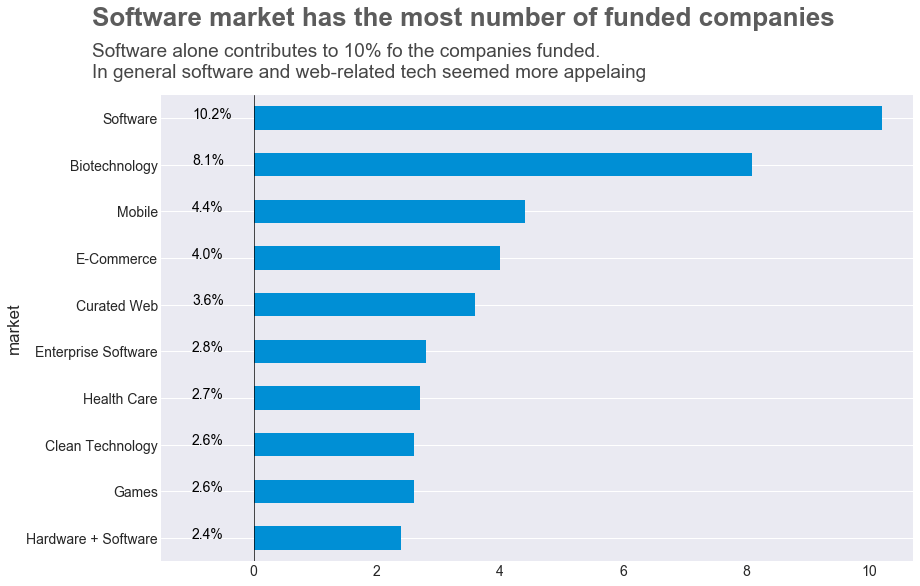

In [18]:
# this chart shows the number of companies per category for the top 10 markets

texts=['Software market has the most number of funded companies',
      'Software alone contributes to 10% fo the companies funded.\nIn general software and web-related tech seemed more appelaing']


fig, ax = plt.subplots()
plot_obj = fx.barh_plot(markets, ax, x='market', y='percent',figsize=(12,8),kind='barh')
plot_obj = fx.do_headings(plot_obj,fig,headings=texts,what=['main_heading','sub_heading'])

ax.grid(False,axis='x')
fx.change_xlim(plot_obj,left=-1.5) # change xlim and place llabels
plot_obj = fx.label_bars(plot_obj,df=markets,value_label='percent')
ax.legend().remove()


#add additional info


In [55]:
companies_df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [24]:
# Q3:Q3: What are the top 10 markets with the highest average funding in USD?

topX = 10
top_funded_markets = companies_df[['market','funding_total_usd']].groupby(by='market').mean().reset_index()
top_funded_markets['percent'] = top_funded_markets['funding_total_usd'] \
.apply(lambda x: round(x/float(top_funded_markets.funding_total_usd.sum())*100,1))

top_funded_markets = top_funded_markets.sort_values(by='funding_total_usd',ascending=False,inplace=False)[:topX]
top_funded_markets = fx.sort_bars(top_funded_markets)
top_funded_markets

,market,funding_total_usd,percent
0,Chemicals,9.066943e+07,1.1
1,Hospitals,1.020047e+08,1.2
2,B2B Express Delivery,1.050000e+08,1.2
3,Solar,1.111461e+08,1.3
4,Development Platforms,1.138693e+08,1.3
5,Custom Retail,1.196578e+08,1.4
6,Content Creators,1.216822e+08,1.4
7,Trading,1.467448e+08,1.7
8,Oil and Gas,1.712891e+08,2.0
9,Natural Gas Uses,4.000000e+08,4.6


In [51]:
for k in top_funded_markets.funding_total_usd.values.tolist()

[90669430.0,
 102004655.57692307,
 105000000.0,
 111146112.68965517,
 113869292.66666667,
 119657790.0,
 121682222.22222222,
 146744766.41666666,
 171289122.36363637,
 400000000.0]

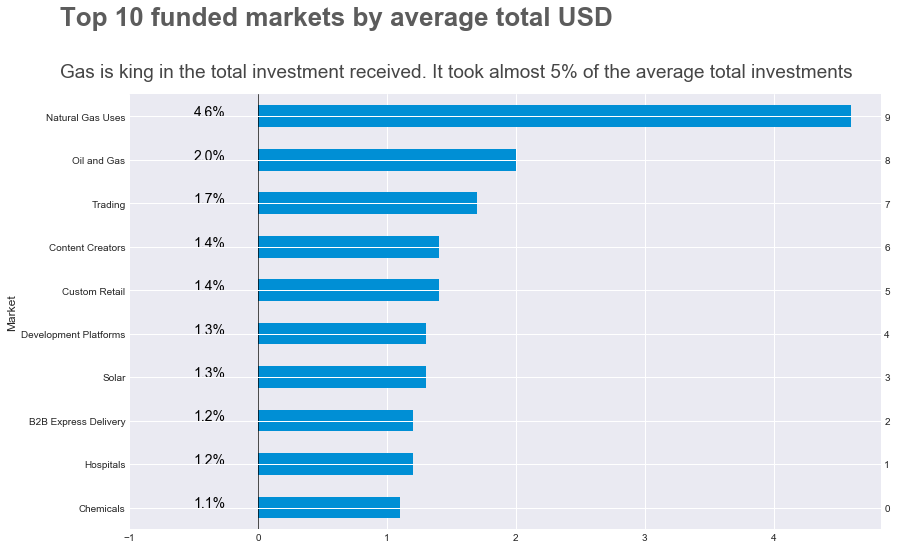

In [44]:
texts=['Top 10 funded markets by average total USD',
      'Gas is king in the total investment received. It took almost 5% of the average total investments']


fig, ax = plt.subplots()
plot_obj = fx.barh_plot(top_funded_markets, ax, x='market', y='percent',figsize=(12,8),kind='barh')
plot_obj = fx.do_headings(plot_obj,fig,headings=texts,what=['main_heading','sub_heading'])

ax.grid(False,axis='y')
fx.change_xlim(plot_obj,left=-1)
plot_obj = fx.label_bars(plot_obj,df=top_funded_markets,value_label='percent')
ax.set_ylabel('Market')

pos = np.arange(10)
ax2 = ax.twinx()
ax2.set_yticks(pos)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticklabels(scoreLabels)

ax.legend().remove()


### Conclusion

